# Лабораторная работа №5
Генераторы тестовых данных, Фанзен-Розенблатт для восстановления плотности на картинках
Leave One Out для оптимизации ширина окна, алгоритм из Scikit-learn

In [113]:
import math
import copy
import numpy as np
import random
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick

In [114]:
def linear_dist(min, max):
    return random.random() * (max - min) + min

def normal_dist(x , mean , sd):
    n = 12
    x = 0
    for i in range (n):
         x = x + random.random()
    return sd * (12/n)**(1/2) * (x - n/2) + mean

def twoPeaks_dist(x, mean1, sd1, mean2, sd2):
    return (np.pi * (sd1 if x <= 0.5 else sd2)) * np.exp(-0.5 * ((x - (mean1 if x <= 0.5 else mean2)) / (sd1 if x <= 0.5 else sd2))**2)

x = [linear_dist(0, 1) for i in range(10)]

mean, sd = 2, 3
mean1, mean2, sd1, sd2 = 2, 3, 3, 6
print(f'''Linear Distribution: {x}
Normal Distribution: {[normal_dist(i, mean, sd) for i in x]}
TwoPeaks Distribution: {[twoPeaks_dist(i, mean1, sd1, mean2, sd2) for i in x]}''')




Linear Distribution: [0.9632562186217549, 0.6309618129969791, 0.19719510958169417, 0.01684194491731783, 0.01165546816985119, 0.12946507041275956, 0.039748076348077976, 0.5743246056430947, 0.2649268630543896, 0.6151772678125]
Normal Distribution: [-1.201291342530685, 1.4498930735709337, 5.306543300278759, -1.8395523313615376, 8.174101324318471, 3.5579180852725685, 2.7161883780395337, 4.401039107739951, 2.161425348900938, 1.9581233859906426]
TwoPeaks Distribution: [17.794220736771578, 17.436054526093557, 7.867817927370814, 7.574950739412522, 7.5662873841049505, 7.759817298553921, 7.61305917662914, 17.3704155987646, 7.973259280594, 17.417892345998162]


In [115]:
def PR(data, x, h):
    rez = 0
    for i in data:
        rez += ((2 * math.pi)**(-1/2)) * np.exp(-1/2 * (((x - i) / h)**2))
    return rez / (len(data)*h)

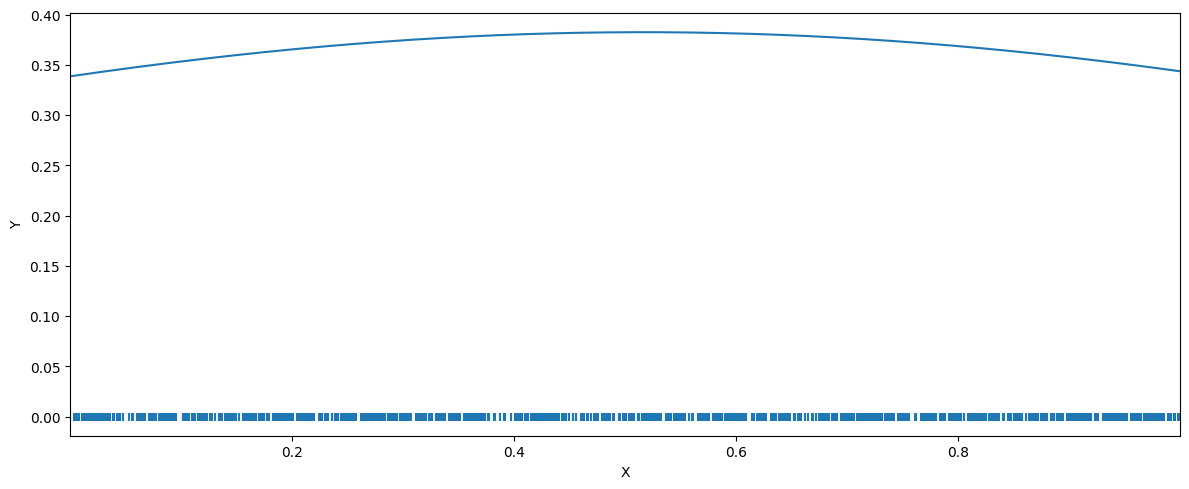

In [116]:
points_count = 1000

linear_data = [linear_dist(0, 1) for i in range(points_count)]
linear_min, linear_max = min(linear_data), max(linear_data)
x = np.linspace(linear_min, linear_max, points_count)
points = np.zeros((points_count))

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(x, PR(linear_data, x, h=1))
ax.scatter(linear_data, points, marker = "|")

ax.set_xlim((linear_min, linear_max))
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()
plt.show()

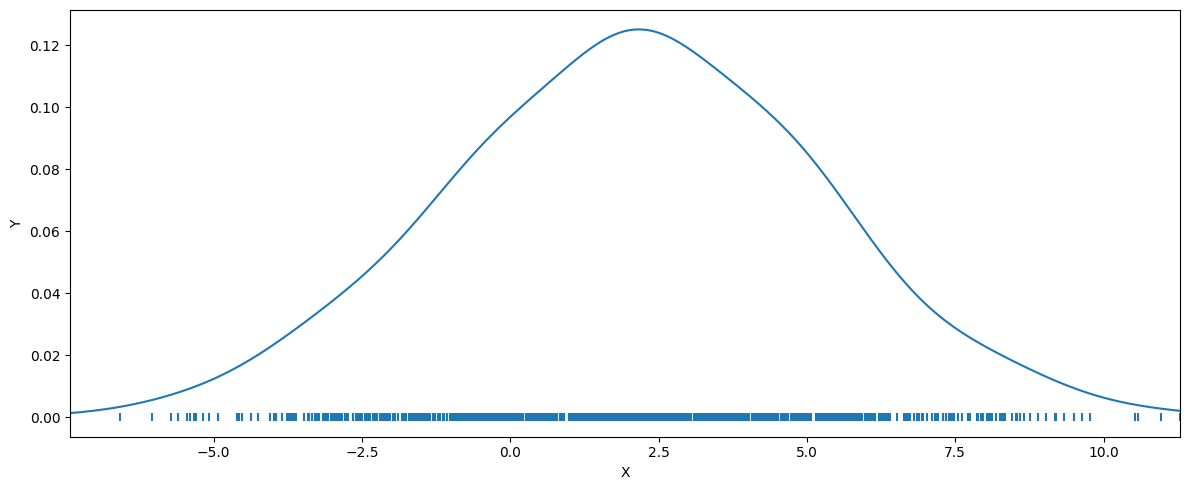

In [117]:
normal_data = [normal_dist(i, 2, 3) for i in linear_data]
normal_min = min(normal_data)
normal_max = max(normal_data)
x = np.linspace(normal_min, normal_max, points_count)

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(x, PR(normal_data, x, h=1))
ax.scatter(normal_data, points, marker = "|")

ax.set_xlim((normal_min, normal_max))
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()
plt.show()

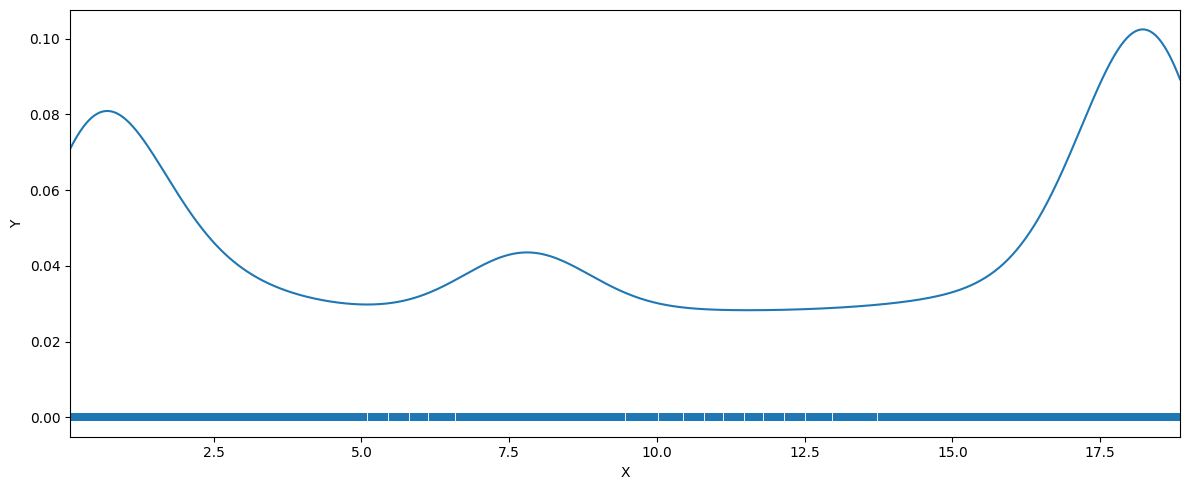

In [118]:
tp_data = [twoPeaks_dist(i, mean1, sd1, mean2, sd2) for i in x]
tp_min = min(tp_data)
tp_max = max(tp_data)
x = np.linspace(tp_min, tp_max, points_count)

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(x, PR(tp_data, x, h=1))
ax.scatter(tp_data,points, marker = "|")

ax.set_xlim((tp_min, tp_max))
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()
plt.show()

# Leave One Out для оптимизации ширины окна

In [120]:
def LeaveOneOut(data, h):
    loo = 0
    for i in range(len(data)):
        loo -= math.log(PR(copy.copy(data[:i] + data[i+1:]), data[i], h=h))
    return loo

list = np.arange(0.5, 10.5, 0.5)
loo_min = 100000
h_min = 11
for h in list:
    if LeaveOneOut(normal_data,h) < loo_min:
        loo_min = LeaveOneOut(normal_data, h)
        h_min = h


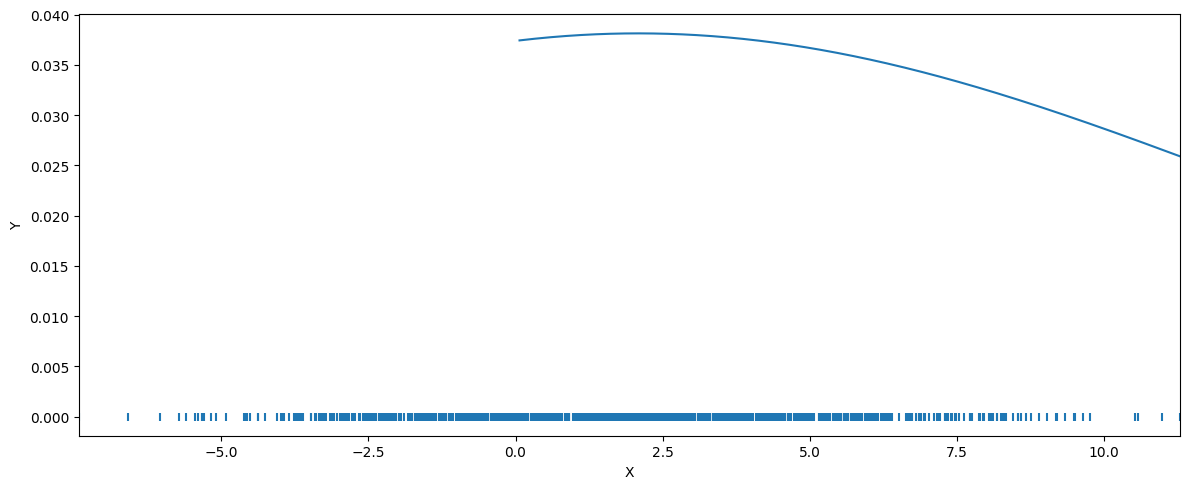

In [121]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(x, PR(normal_data, x,h=10))
points = np.zeros((1000))
ax.scatter(normal_data, points, marker = "|")
ax.set_xlim((normal_min, normal_max))
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.tight_layout()
plt.show()

# Алгоритм Scikit-learn для функции с двумя горбами

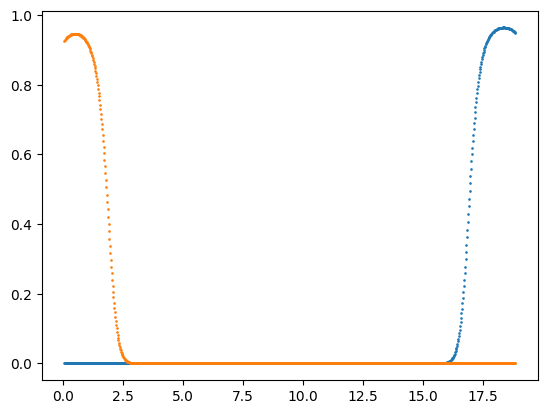

In [132]:
import numpy as np
from sklearn.mixture import GaussianMixture

dataX = np.array(tp_data).reshape(-1, 1)
gm = GaussianMixture(n_components=3, random_state=0).fit(dataX)
gm.means_
plt.scatter(x, gm.predict_proba(np.array(x).reshape(-1, 1))[:,0], s=0.8)
plt.scatter(x, gm.predict_proba(np.array(x).reshape(-1, 1))[:,1], s=0.8)
plt.show()